## 2. Using quickplot

In the previous section, we introduced the `earthkit.plots.quickplot` function as a powerful tool for quickly visualising data with a single line of code.

In this section, we will explore additional features of `quickplot`, including:

- **Overlay** and **subplot** modes
- **Grouping** layers on subplots
- Customising quickplot **workflows**

### Quickplot with multiple fields

To begin, let’s load some sample data from ECMWF’s ERA5 dataset, using **earthkit-data**:

In [1]:
import earthkit as ek

data = ek.data.from_source("sample", "era5-2t-msl-1985122512.grib")
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,2t,surface,0,19851225,1200,0,an,0,regular_ll
1,ecmf,msl,surface,0,19851225,1200,0,an,0,regular_ll


The output of `data.ls()` shows that this dataset contains two fields: 2m temperature (`2t`) and mean sea level pressure (`msl`).

By default, `quickplot` will generate a separate plot for each identified field (which can also be explicitly requested with `mode="subplots"`):

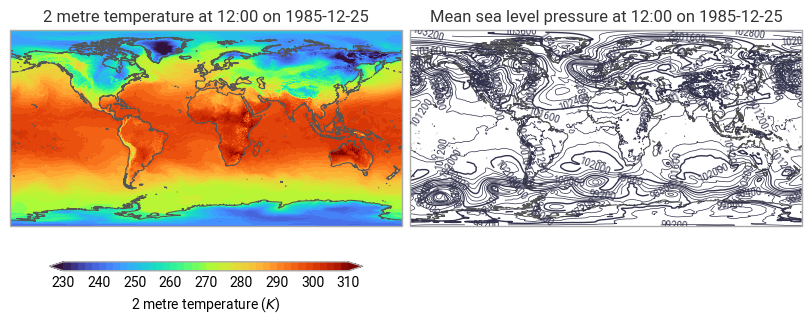

In [2]:
ek.plots.quickplot(data).show()

### Overlaying multiple fields

Using `mode="overlay"`, you can plot multiple fields on the same subplot. For example, to overlay the 2m temperature and mean sea level pressure fields over Spain and France:

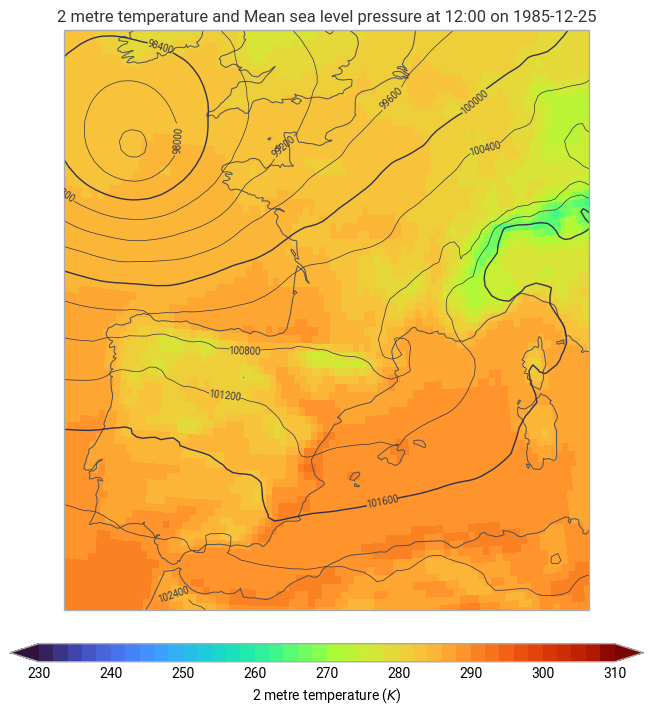

In [3]:
ek.plots.quickplot(data, domain=["Spain", "France"], mode="overlay").show()

### Grouping layers

A common requirement is to group multiple fields on each subplot. For example, if you have wind gusts and mean sea level pressure across different time steps, you may want to group the fields based on their validity time.

#### Example: Grouping Weather Forecast Data

Let’s load a weather forecast dataset containing mean sea level pressure (msl) and wind gusts (10fg6) at multiple timesteps:

In [4]:
data = ek.data.from_source("url", "https://get.ecmwf.int/repository/test-data/metview/gallery/fc_msl_wg_joachim.grib")
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,msl,surface,0,20111215,0,0,fc,0,regular_ll
1,ecmf,10fg6,surface,0,20111215,0,0,fc,0,regular_ll
2,ecmf,msl,surface,0,20111215,0,6,fc,0,regular_ll
3,ecmf,10fg6,surface,0,20111215,0,0-6,fc,0,regular_ll
4,ecmf,msl,surface,0,20111215,0,12,fc,0,regular_ll
5,ecmf,10fg6,surface,0,20111215,0,6-12,fc,0,regular_ll
6,ecmf,msl,surface,0,20111215,0,18,fc,0,regular_ll
7,ecmf,10fg6,surface,0,20111215,0,12-18,fc,0,regular_ll
8,ecmf,msl,surface,0,20111215,0,24,fc,0,regular_ll
9,ecmf,10fg6,surface,0,20111215,0,18-24,fc,0,regular_ll


This dataset contains multiple 9 wind gust fields and 9 sea level pressure fields, each with a different forecast time (stepRange).

To group the data by validity time, use the `groupby` argument:

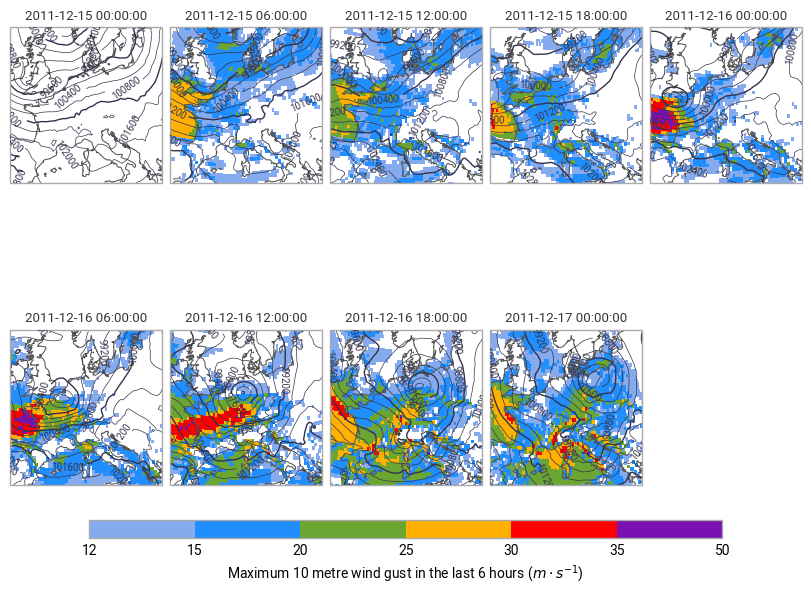

In [5]:
ek.plots.quickplot(data, domain=[-5, 23, 38, 60], groupby="valid_time").show()

Each subplot now represents a specific validity time, with both mean sea level pressure and wind gusts displayed together.

<div class="alert alert-block alert-info">
<strong>NOTE: </strong> The <code>groupby</code> option is not compatible with <code>mode="overlay"</code> - the overlay mode will always put <strong>all</strong> fields on the same subplot.
</div>

### Customising quickplot workflows

You can further customize your plots by modifying the **earthkit-plots** `schema` (which we will cover in more detail later in this user guide). This allows you to control the elements that appear in your plots.

For example, to define a custom quickplot workflow that includes coastlines and titles, use:

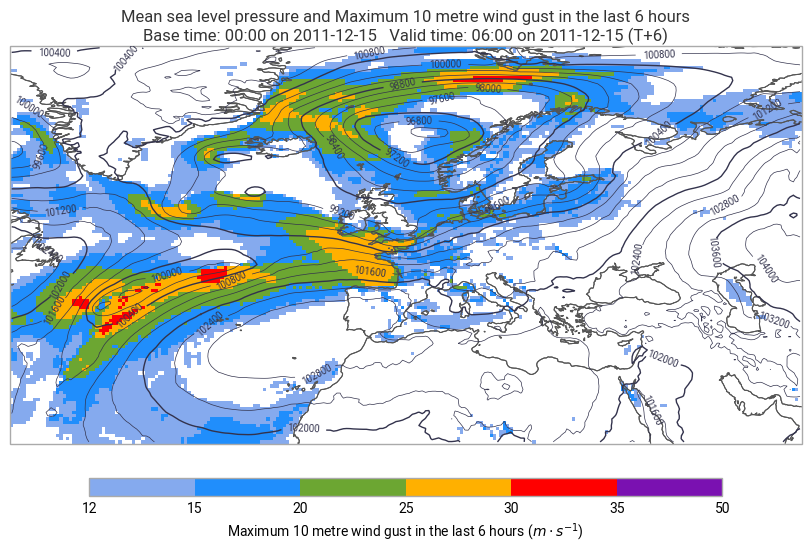

In [6]:
with ek.plots.schema.set(quickmap_subplot_workflow=["coastlines", "title"]):
    ek.plots.quickplot(data.sel(valid_time="2011-12-15T06:00:00"), mode="overlay")

This ensures that every generated plot includes coastlines and a title by default.

### What's next?

In this section we covered some of the flexible options for `quickplot`, allowing you to visualise complex datasets in a single line of code.

However, while `quickplot` is a useful method of quickly visualising a dataset, its super-concise API doesn't make it easy to produce highly customised plots with user-defined layouts, styles and layers.

In the next section, we will explore the fundamental components of **earthkit-plots** figures, and explore how to build a plot from scratch.